# Heart Disease Research Part II 

Data `heart_disease.csv` contains the following variables:

- __age__: age in years
- __sex__: sex assigned at birth; 'male' or 'female'
- __trestbps__: resting blood pressure in mm Hg
- __chol__: serum cholesterol in mg/dl
- __cp__: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- __exang__: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- __fbs__: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- __thalach__: maximum heart rate achieved in exercise test
- __heart_disease__: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

Import modules

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

Load a dataframe named `heart` from `heart_disease.csv`

In [3]:
# load data
heart = pd.read_csv('heart_disease.csv')

Inspect the first few rows of data using the `.head()` method.

In [4]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, `thalach` gives us the highest heart rate that the patient achieved during this test.

Is `thalach` associated with whether or not a patient will ultimately be diagnosed with heart disease? Use `sns.boxplot()` to plot side by side box plots of `thalach` for patients who were and were not diagnosed with heart disease (indicated by the `heart_disease` variable). Do you think there is a relationship between these variables?

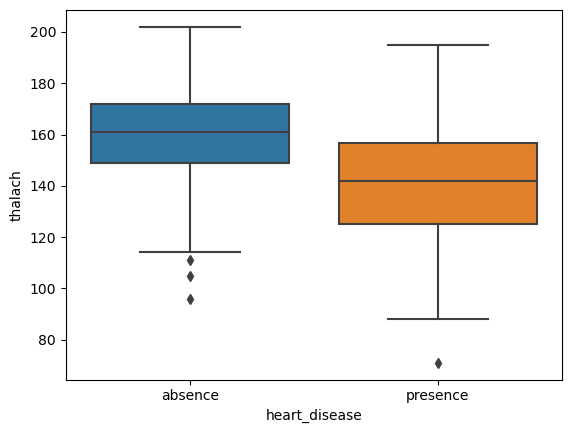

In [8]:
sns.boxplot(x = heart.heart_disease, y = heart.thalach)
plt.show()

In order to investigate this question further, save the values for `thalach` among patients who were diagnosed with heart disease as a variable named `thalach_hd`. Then save the values of `thalach` among patients who were not diagnosed with heart disease as `thalach_no_hd`.

In [9]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

Calculate and print the difference in mean `thalach` for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [13]:
mean_diff_thalach = np.mean(thalach_no_hd) - np.mean(thalach_hd)
median_diff_thalach = np.median(thalach_no_hd) - np.median(thalach_hd)
print("Mean difference thalach: " + str(mean_diff_thalach))
print("Median difference thalach: " + str(median_diff_thalach))

Mean difference thalach: 19.11905597473242
Median difference thalach: 19.0


We’d like to find out if the average `thalach` of a heart disease patient is significantly different from the average `thalach` for a person without heart disease.

- __Null__: The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.
- __Alternative__: The average `thalach` for a person with heart disease is __NOT__ equal to the average `thalach` for a person without heart disease.

Run the hypothesis test and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average `thalach` for people with heart disease compared to people with no heart disease?

In [26]:
tstat, pval = ttest_ind(thalach_hd,thalach_no_hd)
print("P-value is " + str(pval))

P-value is 3.456964908430172e-14


There is a significant difference in average `thalach` for people with heart disease compared to people with no heart disease.

Using the same process, investigate at least one other quantitative variable. Options include `age`, `trestbps` (resting blood pressure), and `chol` (cholesterol). Are any of these variables also significantly associated with heart disease?

Investigate the association between `age` and `heart disease`

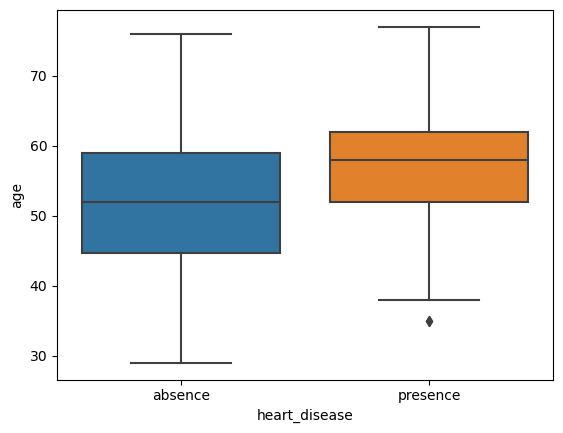

In [18]:
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()

In [20]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

age_mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
age_median_diff = np.median(age_hd) - np.median(age_no_hd)
print("Age mean difference: " + str(age_mean_diff))
print("Age median difference: " + str(age_median_diff))

Age mean difference: 4.040533426917001
Age median difference: 6.0


Hypothesis testing:
Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

In [25]:
tstat, pval = ttest_ind(age_hd, age_no_hd)
print("P-value is " + str(pval))

P-value is 8.955636917529706e-05


There is a __significant__ difference in average `age` for people with heart disease compared to people with no heart disease.

### Investigate the association between `trestbps` and `heart disease`


__Hypothesis testing:__
- __Null:__ The average `trestbps` of people with heart disease is __equal__ to the average `trestbps` of people without heart disease.
- __Alternative:__ The average `trestbps` of people with heart disease is __different__ than the average `trestbps` of people without heart disease..

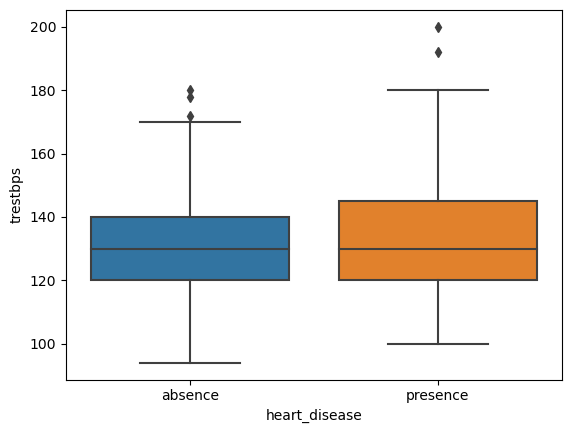

In [5]:
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()

In [6]:
trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']

trestbps_mean_diff = np.mean(trestbps_hd) - np.mean(trestbps_no_hd)
trestbps_median_diff = np.median(trestbps_hd) - np.median(trestbps_no_hd)
print("Resting blood pressure mean difference: " + str(trestbps_mean_diff))
print("Resting blood pressure median difference: " + str(trestbps_median_diff))

Resting blood pressure mean difference: 5.318345323740999
Resting blood pressure median difference: 0.0


In [31]:
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print("P-value is " + str(pval))

P-value is 0.008548268928594928


There is a __significant__ difference in average resting blood pressure for people with heart disease compared to people with no heart disease.

Investigate the association between `chol` and `heart disease`

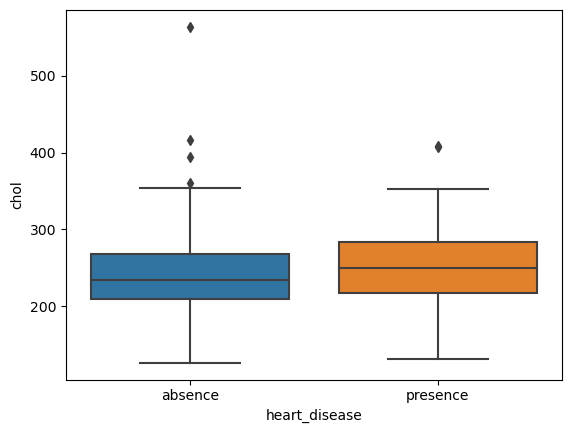

In [32]:
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()

In [33]:
chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']

chol_mean_diff = np.mean(chol_hd) - np.mean(chol_no_hd)
chol_median_diff = np.median(chol_hd) - np.median(chol_no_hd)
print("Cholesterol mean difference: " + str(chol_mean_diff))
print("Cholesterol median difference: " + str(chol_median_diff))

Cholesterol mean difference: 8.834576241445887
Cholesterol median difference: 14.5


In [34]:
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print("P-value is " + str(pval))

P-value is 0.13914167020436527


There is a __no significant__ difference in average cholesterol for people with heart disease compared to people with no heart disease.

### Investigate the association between `thalach` and `heart disease`

__Hypothesis testing:__
- __Null:__ People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average `thalach`.
- __Alternative:__ People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average `thalach`.

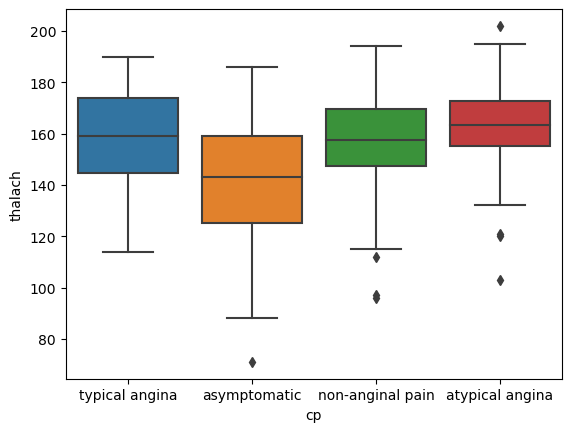

In [35]:
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()

In [36]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

fstat, pval = f_oneway(thalach_typical, thalach_asymptom,thalach_nonangin,thalach_atypical)
print("P-value is " + str(pval))

P-value is 1.9065505247705008e-10


In [41]:
results = pairwise_tukeyhsd(endog=heart.thalach , groups=heart.cp)
print(results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


People who are asymptomatic has significantly lower maximum heart rate compared to the people who have typical angina, atypical angina and non-anginal pain.

In [39]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
Xtab

heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


In [42]:
chi2, pval, dof, exp = chi2_contingency(Xtab)
print("P-value is " + str(pval))

P-value is 1.2517106007837527e-17


People with heart disease who are asymptomatic is __significantly different__ than people without the heart disease.

# Further Exploration

### Investigate the association between `sex` and `heart disease`.

__Hypothesis testing:__
- __Null:__ There is no association between sex and whether or not someone is diagnosed with heart disease.
- __Alternative:__ There is an association between sex and whether or not someone is diagnosed with heart disease.

In [7]:
sex_table = pd.crosstab(heart.sex, heart.heart_disease)
print(sex_table)

heart_disease  absence  presence
sex                             
female              72        25
male                92       114


Male tend to have heart disease compared to female

In [8]:
chi2, pval, dof, exp = chi2_contingency(sex_table)
print("P-value is " + str(pval))

P-value is 2.666712348180942e-06


There is a __significant__ association between sex and whether or not someone is diagnosed with heart disease.

### Investigate the association between whether the patient experiences exercise-induced angina and heart disease.

__Hypothesis testing:__
- __Null:__ There is no association between whether the patient experiences exercise-induced angina and whether or not someone is diagnosed with heart disease.
- __Alternative:__ There is an association between whether the patient experiences exercise-induced angina and whether or not someone is diagnosed with heart disease.

In [9]:
exercise_tab = pd.crosstab(heart.exang, heart.heart_disease)
print(exercise_tab)

heart_disease  absence  presence
exang                           
0.0                141        63
1.0                 23        76


People with heart disease tend to experience exercise-induced angina compared to people without heart disease.

In [10]:
chi2, pval, dof, exp = chi2_contingency(exercise_tab)
print("P-value is " + str(pval))

P-value is 1.413788096718085e-13


There is a significant association between whether the patient experiences exercise-induced angina and whether or not someone is diagnosed with heart disease.

### Investigate the association between patient's fasting blood sugar and heart disease.

__Hypothesis testing:__
- __Null:__ There is no association between the patient's fasting blood sugar and whether or not someone is diagnosed with heart disease.
- __Alternative:__ There is an association between the patient's fasting blood sugar and whether or not someone is diagnosed with heart disease.

In [11]:
fbs_tab = pd.crosstab(heart.fbs, heart.heart_disease)
print(fbs_tab)

heart_disease  absence  presence
fbs                             
0.0                141       117
1.0                 23        22


People with and without heart disease tend to have fasting blood sugar less than 120 mg/dl.

In [12]:
chi2, pval, dof, exp = chi2_contingency(fbs_tab)
print("P-value is " + str(pval))

P-value is 0.7812734067063785


There is no association between the patient's fasting blood sugar and whether or not someone is diagnosed with heart disease.